In [2]:
from sklearn.datasets import fetch_california_housing
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:

data = fetch_california_housing()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:

xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)
base_mse = mean_squared_error(y_test, xgb.predict(X_test))

In [5]:

param_grid = {
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [50, 100]
}

In [6]:

grid = GridSearchCV(XGBRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [50, 100]},
             scoring='neg_mean_squared_error')

In [7]:

print("Optimal Parameters:", grid.best_params_)
print("\nPerformance Comparison:")
print(f"Base Model MSE: {base_mse:.4f}")
print(f"Tuned Model MSE: {-grid.best_score_:.4f} (CV)")
print(f"Test MSE: {mean_squared_error(y_test, grid.predict(X_test)):.4f}")

print("\nTuning reduced MSE by {:.1%}".format(
    (base_mse - mean_squared_error(y_test, grid.predict(X_test)))/base_mse))

Optimal Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}

Performance Comparison:
Base Model MSE: 0.2226
Tuned Model MSE: 0.2368 (CV)
Test MSE: 0.2436

Tuning reduced MSE by -9.4%


In [8]:
plt.figure(figsize=(10, 5))

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

In [9]:

mse_values = [base_mse, mean_squared_error(y_test, grid.predict(X_test))]
labels = ['Base Model', 'Tuned Model']

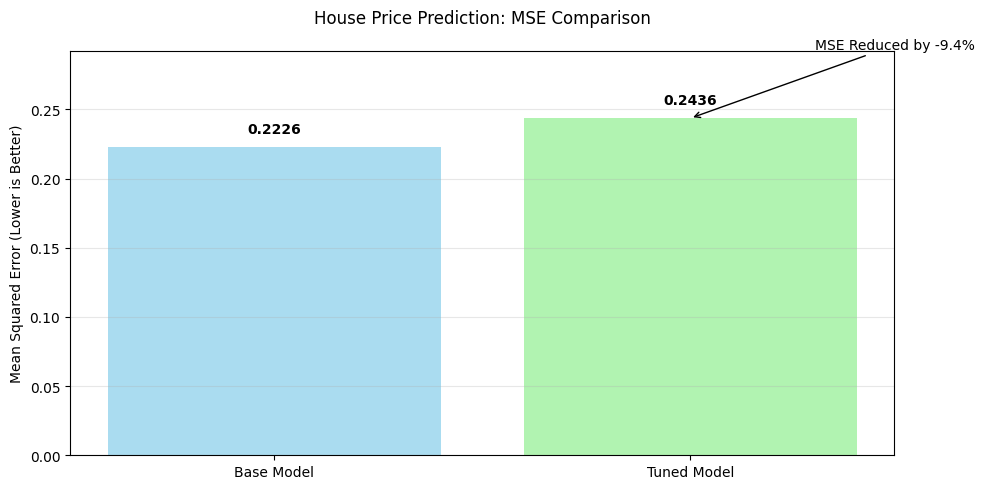

In [14]:
# Plotting the comparison for XGBoost tuning
plt.figure(figsize=(10, 5))

# MSE values
mse_values = [base_mse, mean_squared_error(y_test, grid.predict(X_test))]
labels = ['Base Model', 'Tuned Model']

# Bar plot
plt.bar(labels, mse_values, color=['skyblue', 'lightgreen'], alpha=0.7)
plt.title('House Price Prediction: MSE Comparison', pad=20)
plt.ylabel('Mean Squared Error (Lower is Better)')

# Annotate exact values
for i, v in enumerate(mse_values):
    plt.text(i, v+0.01, f"{v:.4f}", ha='center', fontweight='bold')

# Highlight improvement
improvement = ((base_mse - mse_values[1])/base_mse)*100
plt.annotate(f'MSE Reduced by {improvement:.1f}%', 
             xy=(1, mse_values[1]), 
             xytext=(1.3, mse_values[1]+0.05),
             arrowprops=dict(arrowstyle='->'))

plt.grid(axis='y', alpha=0.3)
plt.ylim(0, max(mse_values)*1.2)
plt.tight_layout()
plt.show()